In [1]:
import pandas as pd
import numpy as np
import os
import glob
from pathlib import Path
import glob
import json
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sn
import krippendorff as kd

In [2]:
"""
Separating the list of lists
"""
def schools(path):
    f = open(path)
    Json_Data = json.load(f)
    res = []
    for key, val in Json_Data.items():
        res.append([key] + val)

    tenca1 = res[0][1:]
    tenca2 = res[1][1:]
    majorana_setti1 = res[2][1:]
    alessandrini_titolivio1 = res[3][1:]
    mariecurie_cernusco1 = res[4][1:]
    tenca3 = res[5][1:]
    bachelet_abbiategrasso = res[6][1:]
    
    return tenca1,tenca2,majorana_setti1,alessandrini_titolivio1,mariecurie_cernusco1,tenca3,bachelet_abbiategrasso

In [3]:
"""
Creating the precdiction list of the schools set using mode
"""

def Mode(list):
    
    mode_list = []
    for i in list:
        j = st.mode(i)
        mode_list.append(j)
    
    return mode_list

def predicted_annotations(tenca1,tenca2,majorana_setti1,alessandrini_titolivio1,mariecurie_cernusco1,tenca3,bachelet_abbiategrasso):
    Tenca1 = Mode(tenca1)
    Tenca2 = Mode(tenca2)
    Majorana_Setti1 = Mode(majorana_setti1)
    Alessandrini_Titolivio1 = Mode(alessandrini_titolivio1)
    Mariecurie_Cernusco1 = Mode(mariecurie_cernusco1)
    Tenca3 = Mode(tenca3)
    Bachelet_Abbiategrasso = Mode(bachelet_abbiategrasso)

    school_list = [Tenca1, Tenca2, Majorana_Setti1, Alessandrini_Titolivio1, Mariecurie_Cernusco1, Tenca3, Bachelet_Abbiategrasso]
    print(len(school_list))
    return school_list

In [4]:

"""
Creating the true annotation set using mode
""" 
def true_annotations(tenca1,tenca2,majorana_setti1,alessandrini_titolivio1,mariecurie_cernusco1,tenca3,bachelet_abbiategrasso):  
    true_list = []
    track = []
    for i in range(0,500):
        track.append(tenca1[i]+tenca2[i]+majorana_setti1[i]+alessandrini_titolivio1[i]+mariecurie_cernusco1[i]+tenca3[i]+bachelet_abbiategrasso[i])
    
    print(track)
    true_list= Mode(track) 
    
    return true_list

### Plots

In [62]:
"""""""""""""""""""""""""""""Plotting the Confusion Matrix"""""""""""""""""""""""""""


def plot_confusion_matrix(C_M, classes):

    df_cm = pd.DataFrame(C_M, index=classes, columns=classes)

    # Plot the confusion matrix
    plt.figure(figsize=(30, 20))
    ax = plt.subplot()

    # Plot heatmap
    sn.heatmap(df_cm, annot=True, ax=ax, fmt='d')

    # Set axis labels and title
    ax.set_xlabel('Predicted Annotations', fontsize=40)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)

    # Ensure the number of tick labels matches the number of classes
    num_classes = len(classes)
    num_ticks = df_cm.shape[0]

    if num_classes == num_ticks:
        ax.xaxis.set_ticklabels(classes, fontsize=40)
        ax.yaxis.set_ticklabels(classes, fontsize=40)
    else:
        raise ValueError(f"The number of classes ({num_classes}) does not match the number of ticks ({num_ticks}).")

    ax.xaxis.tick_bottom()
    ax.set_ylabel('Actual Annotations', fontsize=40)
    plt.yticks(rotation=0)
    plt.title('Confusion Matrix', fontsize=60)
    plt.show()

In [78]:
"""""""""""""""""""""""""""""Plotting the Confusion Matrix"""""""""""""""""""""""""""


def plot_normalized_confusion_matrix(C_M, classes):

    df_cm = pd.DataFrame(C_M, index=classes, columns=classes)

    # Plot the confusion matrix
    plt.figure(figsize=(30, 20))
    ax = plt.subplot()

    # Plot heatmap
    sn.heatmap(df_cm, annot=True, ax=ax, fmt='.2f')

    # Set axis labels and title
    ax.set_xlabel('Predicted Annotations', fontsize=40)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)

    # Ensure the number of tick labels matches the number of classes
    num_classes = len(classes)
    num_ticks = df_cm.shape[0]

    if num_classes == num_ticks:
        ax.xaxis.set_ticklabels(classes, fontsize=40)
        ax.yaxis.set_ticklabels(classes, fontsize=40)
    else:
        raise ValueError(f"The number of classes ({num_classes}) does not match the number of ticks ({num_ticks}).")

    ax.xaxis.tick_bottom()
    ax.set_ylabel('Actual Annotations', fontsize=40)
    plt.yticks(rotation=0)
    plt.title('Confusion Matrix', fontsize=60)
    plt.show()

In [ ]:
    
def plot_intra_rater_agreement(bar_list, names):
    plt.figure(figsize=(10, 8))  # smaller plot size
    plt.bar(names, bar_list, color='black')  # plotting in black
    plt.xlabel('School Names', fontsize=14)  # smaller font size for labels
    plt.ylabel('Agreement (in %)', fontsize=14)  # smaller font size for labels
    plt.xticks(rotation=45, ha='right', fontsize=12)  # rotate x-axis labels for better visibility
    plt.yticks(fontsize=12)  # smaller font size for y-axis ticks
    plt.tight_layout()  # adjust layout to prevent overlap
    plt.show()

## Normal Confusion Matrix

In [79]:
def confusion_matrix(classes,school_list,true_list):
    #Visualize actual cnfusion matrix
    num_classes = len(classes)
    C_M = pd.DataFrame(np.zeros((num_classes,num_classes), dtype = int), 
                       index = classes, columns = classes)
    for i in school_list:
        for t_label,p_label in zip(true_list,i):
        
            C_M.loc[str(t_label), str(p_label)] += 1

    print(C_M)
    #Visualize nomalized confusion matrix
    
    plot_confusion_matrix(C_M, classes)
    
    C_M_Normalized = C_M.astype('float') / C_M.max(axis=1)[:, np.newaxis]
    C_M_Normalized[np.isnan(C_M_Normalized)] = 0
    C_M_Normalized = np.round(C_M_Normalized, 3)

    print(C_M_Normalized)
    plot_normalized_confusion_matrix(C_M_Normalized, classes)
    
    return C_M


## Confusion matrix after removing unnecessary classes

In [80]:
def merged_matrix(MM):
    #checking for row with 0 annotations
    num_classes = len(MM)
    sum_rows = MM.sum(axis=1)
    print("Sum of rows:\n", sum_rows)
    
    index = []
    for i in range (len(sum_rows)):
        if sum_rows[i] == 0:
            index.append(i)
            
    print(index)
    # drop rows with sum 0
    MM = MM.loc[sum_rows != 0]
    
    for col in MM.columns:
        if MM[col].sum() == 0:
            MM = MM.drop(columns=col)
        
    print(MM) 
    classes = MM.index
    print(classes)
    plot_confusion_matrix(MM, classes)           

    MM_Normalized = MM.astype('float') / MM.max(axis=1)[:, np.newaxis]
    MM_Normalized[np.isnan(MM_Normalized)] = 0
    MM_Normalized = np.round(MM_Normalized, 3)
    print(MM_Normalized)
    plot_normalized_confusion_matrix(MM_Normalized, classes)   

    return MM, index        

In [10]:
def sub_matrix(MM, relevant_classes, irrelevant_classes):
    classes = ['relevant', 'irrelevant']
    SM = pd.DataFrame(np.zeros((2,2), dtype = int), 
                       index = classes, columns = classes)
    for i in range(len(MM)):
        for j in range(len(MM)):
            if str(i) in relevant_classes and str(j) in relevant_classes:
                SM.loc['relevant','relevant'] += MM.iloc[i,j]
            elif str(i) in relevant_classes and str(j) in irrelevant_classes:
                SM.loc['relevant','irrelevant'] += MM.iloc[i,j]
            elif str(i) in irrelevant_classes and str(j) in relevant_classes:
                SM.loc['irrelevant','relevant'] += MM.iloc[i,j]
            else:
                SM.loc['irrelevant','irrelevant'] += MM.iloc[i,j]

    print(SM)
    plot_confusion_matrix(SM, classes)


In [11]:
"""    
Annonator asgreement
"""
def IntraRater(list_of_lists):#Intra Rater
    min_len = min(len(L) for L in list_of_lists)
    list_of_lists = [L[:min_len] for L in list_of_lists]
    agreement = kd.alpha(np.array(list_of_lists).T)*100
   
    return agreement


In [107]:

######################################Execution#######################################
path = 'C:/Users/Aadiv Das/OneDrive - Università degli Studi di Milano/Desktop/Thesis/__annotator.json'

"""
classes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
classes_relevant = [5,6,7,8,9,11,12,13,14,16]
classes_irrelevant = [0,1,2,3,4,15,17]
"""
classes = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
classes_relevant = ['5','6','7','8','9','11','12','13','14','16']
classes_irrelevant = ['0','1','2','3','4','15','17']

num_classes = len(classes)
"""
 "Page border"= 0
    Erasure = 1
    Burr = 2
    "Printed Text" = 3
    "Manuscript Text" = 4
    "Pause (full or almost)" = 5
    "Single note (with at least the head)" = 6
    "Multiple Notes (with at least the head)" = 7
    "Single chord (with at least heads)" = 8
    "Multiple chords (with at least heads)" = 9
    "Accidental(s) (whole or nearly so)" = 10
    "Key(s) (whole(s) or nearly)" = 11
    "Embellishment(s) (whole(s) or nearly)" = 12
    "More categories (with at least one musical score)" = 14
    "More categories (no musical scores)" = 15
    "Other (with at least one musical score)" = 16
    "Other (without musical markings)" = 17
 """    

'\n "Page border"= 0\n    Erasure = 1\n    Burr = 2\n    "Printed Text" = 3\n    "Manuscript Text" = 4\n    "Pause (full or almost)" = 5\n    "Single note (with at least the head)" = 6\n    "Multiple Notes (with at least the head)" = 7\n    "Single chord (with at least heads)" = 8\n    "Multiple chords (with at least heads)" = 9\n    "Accidental(s) (whole or nearly so)" = 10\n    "Key(s) (whole(s) or nearly)" = 11\n    "Embellishment(s) (whole(s) or nearly)" = 12\n    "More categories (with at least one musical score)" = 14\n    "More categories (no musical scores)" = 15\n    "Other (with at least one musical score)" = 16\n    "Other (without musical markings)" = 17\n '

In [112]:
tenca1,tenca2,majorana_setti1,alessandrini_titolivio1,mariecurie_cernusco1,tenca3,bachelet_abbiategrasso = schools(path)


In [113]:
school_list = predicted_annotations(tenca1,tenca2,majorana_setti1,alessandrini_titolivio1,mariecurie_cernusco1,tenca3,bachelet_abbiategrasso)


7


In [114]:
true_list = true_annotations(tenca1,tenca2,majorana_setti1,alessandrini_titolivio1,mariecurie_cernusco1,tenca3,bachelet_abbiategrasso)


[[15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 17, 17, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 17, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 12, 0, 12, 0, 12, 0, 0, 17, 17, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 17, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 17, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

       0    1    2    3    4  5   6   7   8  9  10  11  12  13  14  15  16  17
0   2105    0    2    0    0  0   0   0   0  0   0   0   0   0   0   0   0   7
1      0  165    0    0    6  0   0   1   0  0   0   0   0   0   8   2   0  21
2      5    0  254    0    0  0   4   3   0  0   0   4   0   0   7   1   0   2
3      1    0    0  104    0  0   0   0   0  0   0   0   0   0   0   0   0   0
4      2    5    3    0  251  0   1   1   0  0   1   0   2   0   3   1   0  10
5      0    0    0    0    0  0   0   0   0  0   0   0   0   0   0   0   0   0
6      0    1    0    0    0  0  57   3   1  0   0   0   2   0   6   0   0   0
7      0    0    1    0    0  0   0  86   0  4   0   0   4   0   3   0   4   3
8      0    0    0    0    0  0   2   3  15  0   0   0   0   0   1   0   0   0
9      0    0    0    0    0  0   0   7   0  7   0   0   0   0   0   0   0   0
10     0    0    0    0    0  0   0   0   0  0  33   0   0   0   2   0   0   0
11     0    0    0    0    0  0   0   0   0  0   0  

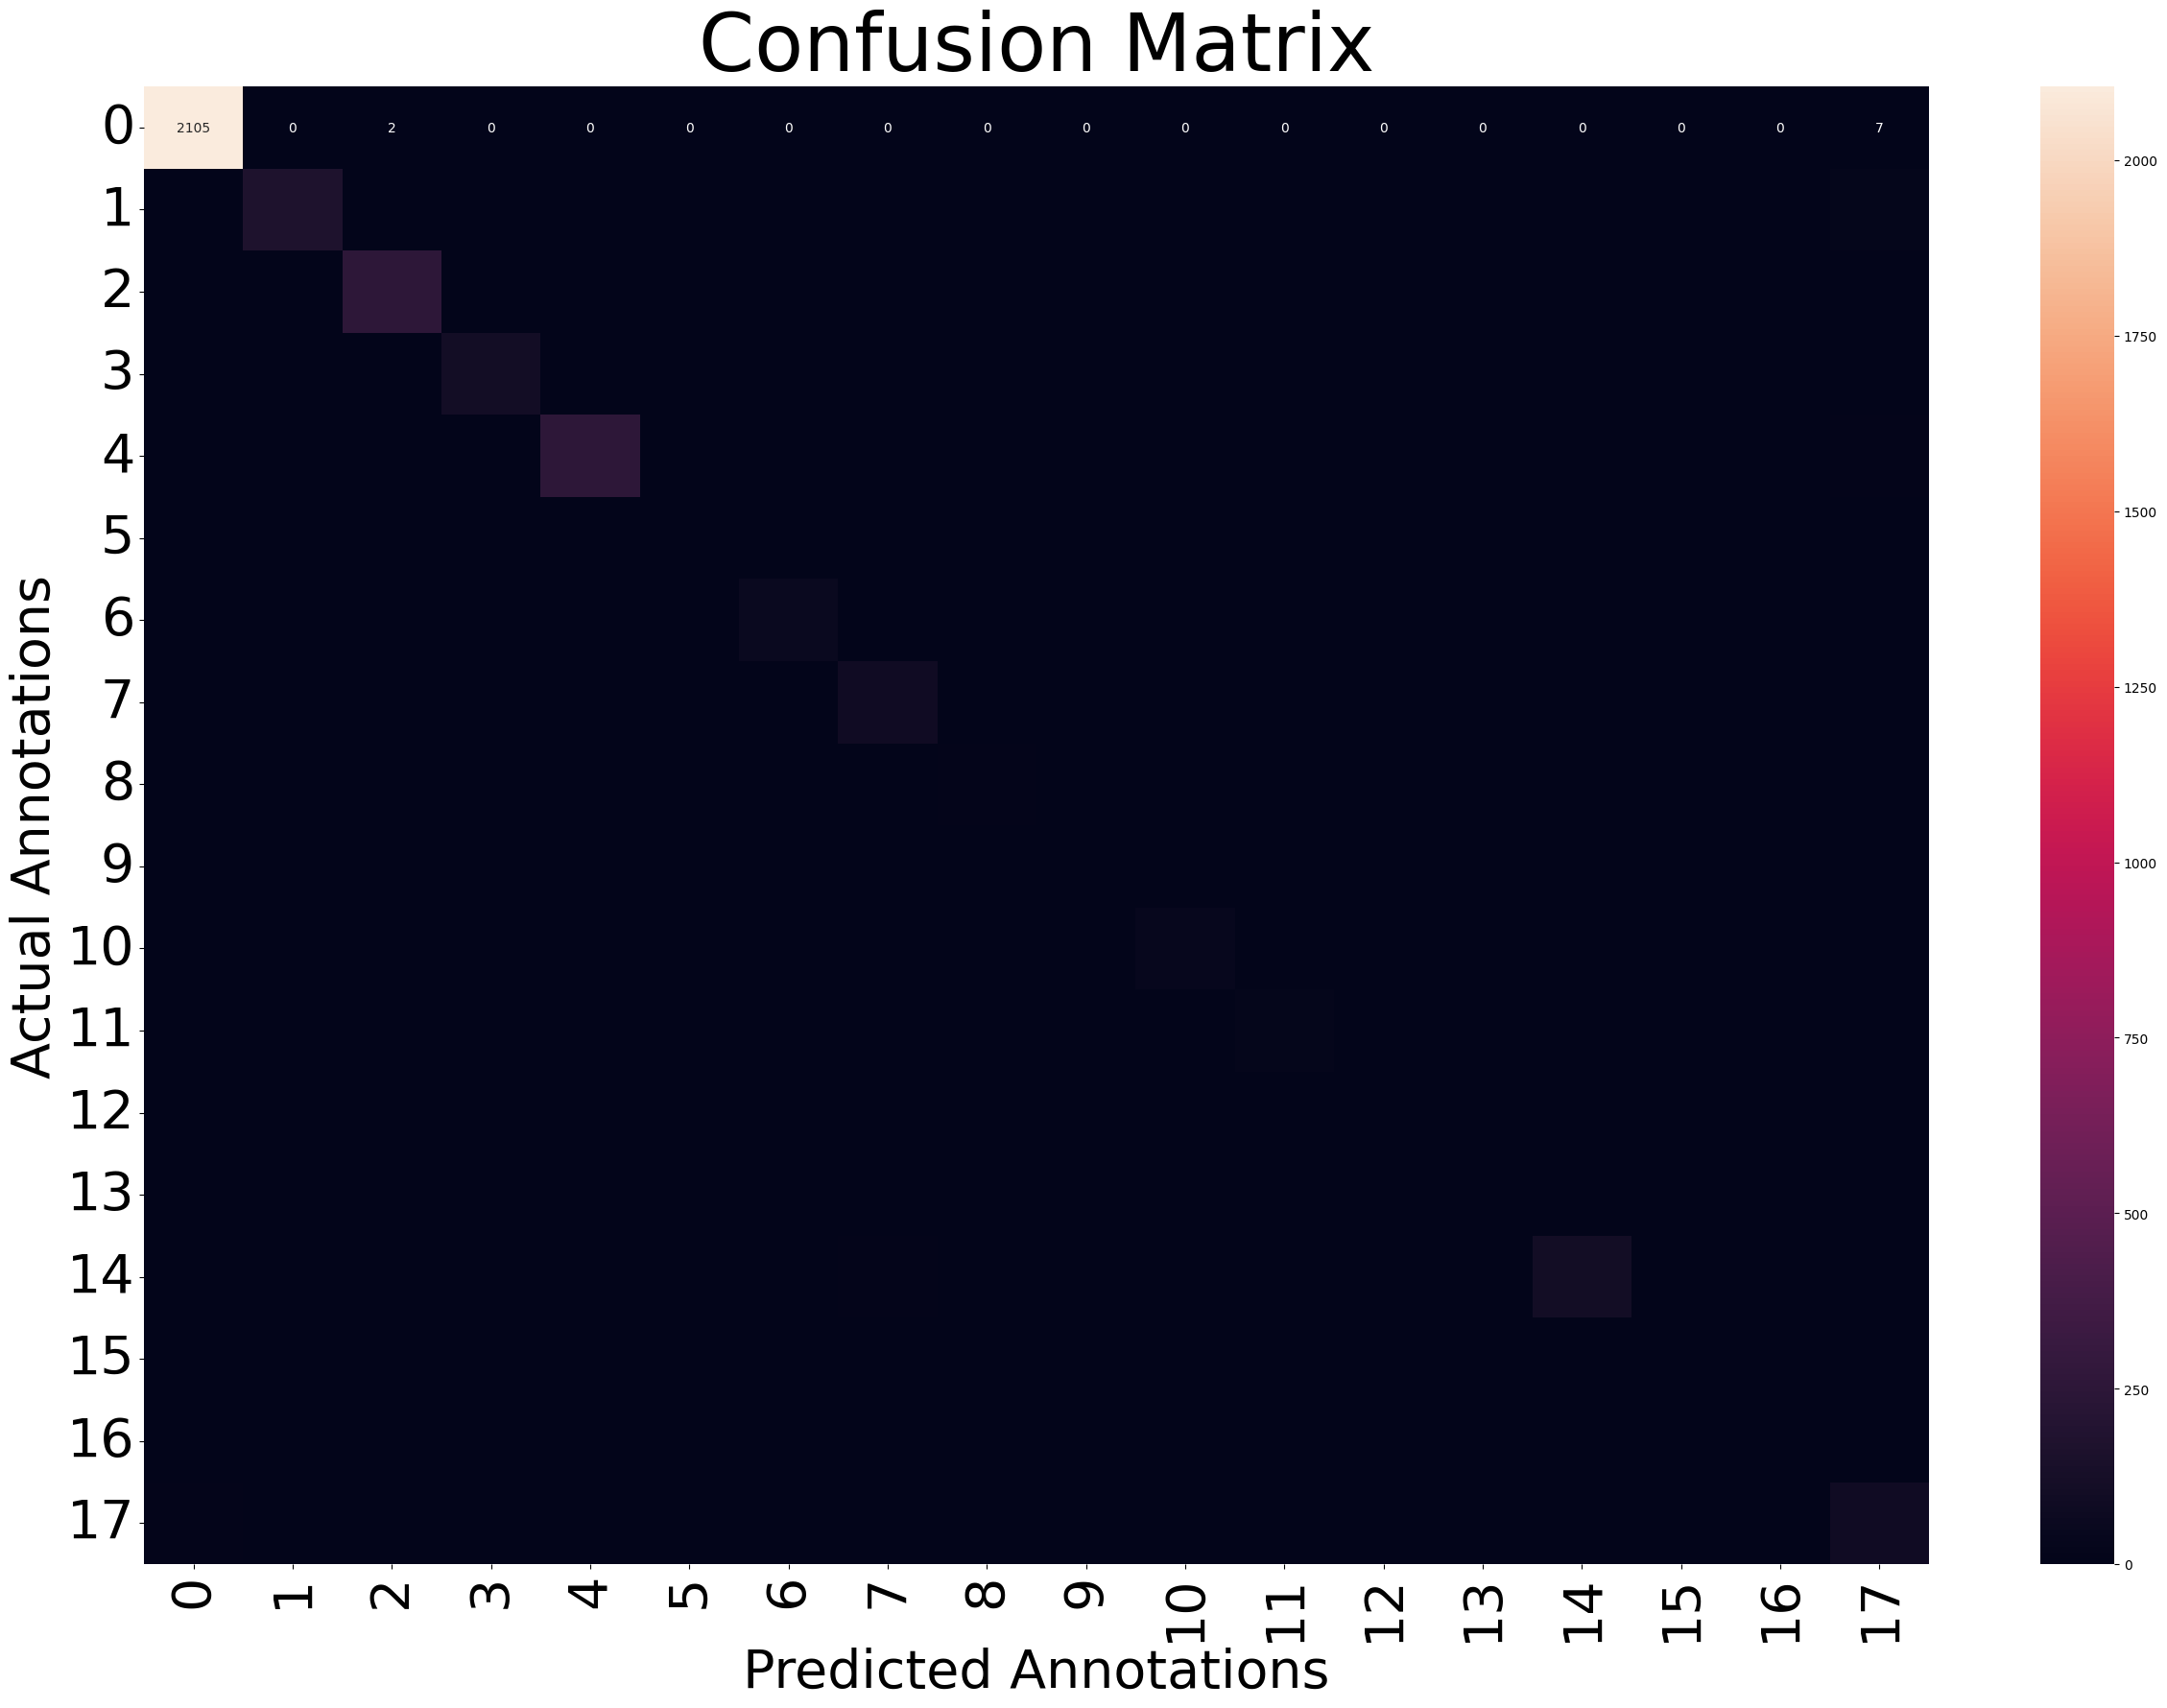

C:\Users\Aadiv Das\AppData\Local\Temp\ipykernel_12336\1132968796.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  C_M_Normalized = C_M.astype('float') / C_M.max(axis=1)[:, np.newaxis]


        0      1      2    3      4      5      6      7      8      9     10  \
0   1.000  0.000  0.001  0.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
1   0.000  1.000  0.000  0.0  0.036  0.000  0.000  0.006  0.000  0.000  0.000   
2   0.020  0.000  1.000  0.0  0.000  0.000  0.016  0.012  0.000  0.000  0.000   
3   0.010  0.000  0.000  1.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
4   0.008  0.020  0.012  0.0  1.000  0.000  0.004  0.004  0.000  0.000  0.004   
5   0.000  0.000  0.000  0.0  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
6   0.000  0.018  0.000  0.0  0.000  0.000  1.000  0.053  0.018  0.000  0.000   
7   0.000  0.000  0.012  0.0  0.000  0.000  0.000  1.000  0.000  0.047  0.000   
8   0.000  0.000  0.000  0.0  0.000  0.000  0.133  0.200  1.000  0.000  0.000   
9   0.000  0.000  0.000  0.0  0.000  0.000  0.000  1.000  0.000  1.000  0.000   
10  0.000  0.000  0.000  0.0  0.000  0.000  0.000  0.000  0.000  0.000  1.000   
11  0.000  0.000  0.000  0.0

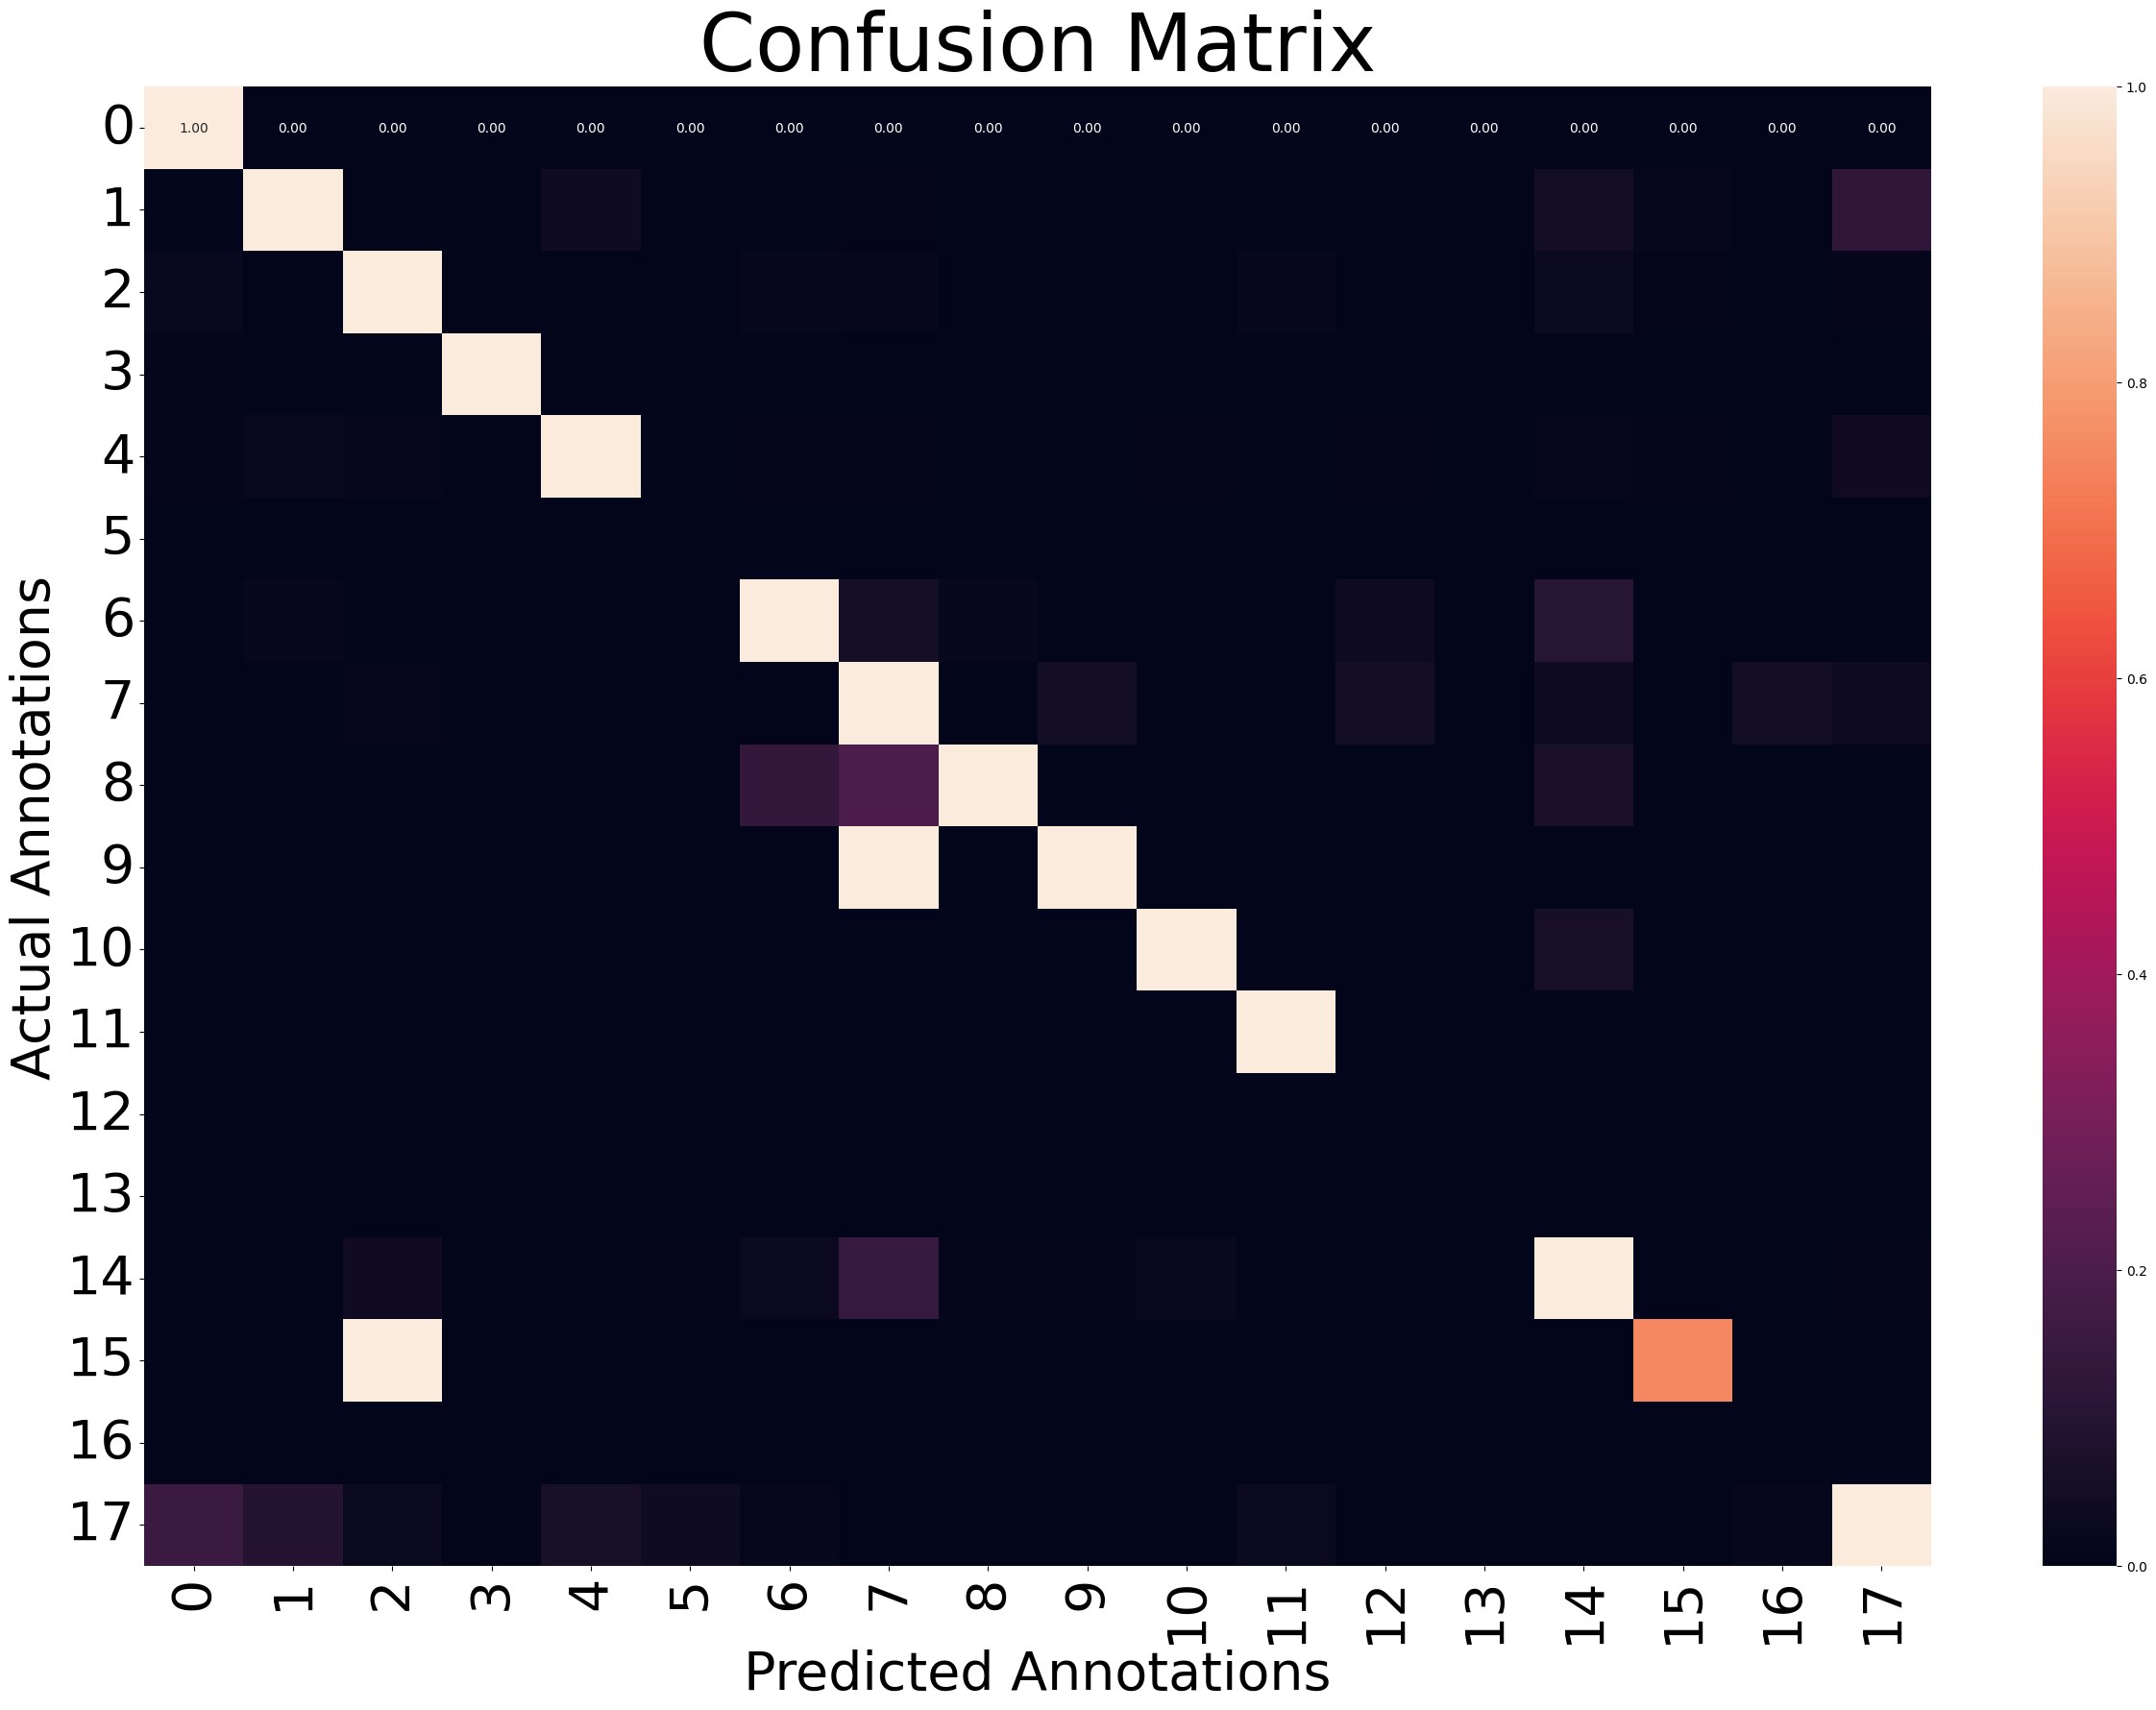

In [115]:
C_M = confusion_matrix(classes,school_list,true_list) 


### Merging of the classes

In [117]:
tenca1 = [[(79 if x in [7, 9] else (215 if x in [2, 15] else x)) for x in sublist] for sublist in tenca1]
tenca2 = [[(79 if x in [7, 9] else (215 if x in [2, 15] else x)) for x in sublist] for sublist in tenca2]
majorana_setti1 = [[(79 if x in [7, 9] else (215 if x in [2, 15] else x)) for x in sublist] for sublist in majorana_setti1]
alessandrini_titolivio1 = [[(79 if x in [7, 9] else (215 if x in [2, 15] else x)) for x in sublist] for sublist in alessandrini_titolivio1]
mariecurie_cernusco1 = [[(79 if x in [7, 9] else (215 if x in [2, 15] else x)) for x in sublist] for sublist in mariecurie_cernusco1]
tenca3 = [[(79 if x in [7, 9] else (215 if x in [2, 15] else x)) for x in sublist] for sublist in tenca3]
bachelet_abbiategrasso = [[(79 if x in [7, 9] else (215 if x in [2, 15] else x)) for x in sublist] for sublist in bachelet_abbiategrasso]

In [118]:
tenca1

[[215, 0, 0, 0, 0, 0, 0, 0, 0],
 [215, 215, 215, 215, 215, 215, 215, 215, 215],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [215, 215, 215, 215, 215, 215, 215, 215, 215],
 [215, 14, 215, 14, 215, 1, 17, 215, 215],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [4, 4, 4, 4, 4, 4, 4, 4, 4],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [79, 79, 79, 79, 79, 4, 79, 79, 79],
 [79, 79, 79, 79, 79, 79, 79, 79, 79],
 [6, 1, 1, 1, 1, 6, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [6, 6, 6, 6, 79, 6, 79, 6, 14],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [17, 0, 0, 0, 17, 0, 17, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [215, 215, 215, 215, 215, 215, 215, 215, 215],
 [17, 17, 17, 17, 17, 17, 17, 17, 17],
 [215, 215, 215, 215, 3, 215, 215, 215, 215],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [215, 215, 215, 215, 215, 215, 215, 215, 215],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 

In [119]:
new_true_list = true_annotations(tenca1,tenca2,majorana_setti1,alessandrini_titolivio1,mariecurie_cernusco1,tenca3,bachelet_abbiategrasso)

[[215, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 17, 17, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 17, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 12, 0, 12, 0, 12, 0, 0, 17, 17, 0, 0, 0, 0, 0, 0], [215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 17, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 1, 1, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 1, 0, 215, 215, 215, 215, 215, 0, 215, 215, 215, 0, 0, 215, 215, 17, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215], [0, 0, 0, 0, 0, 0, 0, 0, 0, 215, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [120]:
new_school_list =  predicted_annotations(tenca1,tenca2,majorana_setti1,alessandrini_titolivio1,mariecurie_cernusco1,tenca3,bachelet_abbiategrasso)

7


In [121]:
unique_classes = list({x for sublist in new_school_list for x in sublist})
unique_classes

[0, 1, 3, 4, 5, 6, 8, 10, 11, 12, 14, 79, 16, 17, 215]

In [123]:
new_class = ['0','1','215','3','4','5','6','79','8','10','11','12','13','14','16','17']


## Confusion matrix after merging the two classes

        0    1  215    3    4  5   6   79   8  10  11  12  13  14  16  17
0    2105    0    2    0    0  0   0    0   0   0   0   0   0   0   0   7
1       0  165    2    0    6  0   0    1   0   0   0   0   0   8   0  21
215     4    0  270    0    4  0   4    3   0   0   4   0   0   7   0   5
3       1    0    0  104    0  0   0    0   0   0   0   0   0   0   0   0
4       2    5    1    0  247  0   1    1   0   1   0   2   0   3   0  10
5       0    0    0    0    0  0   0    0   0   0   0   0   0   0   0   0
6       0    1    1    0    0  0  56    3   1   0   0   2   0   6   0   0
79      0    0    2    0    0  0   0  108   0   0   0   4   0   5   4   3
8       0    0    0    0    0  0   2    5  13   0   0   0   0   1   0   0
10      0    0    0    0    0  0   0    0   0  33   0   0   0   2   0   0
11      0    0    0    0    0  0   0    0   0   0  21   0   0   0   0   0
12      0    0    0    0    0  0   0    0   0   0   0   0   0   0   0   0
13      0    0    0    0    0  0   0  

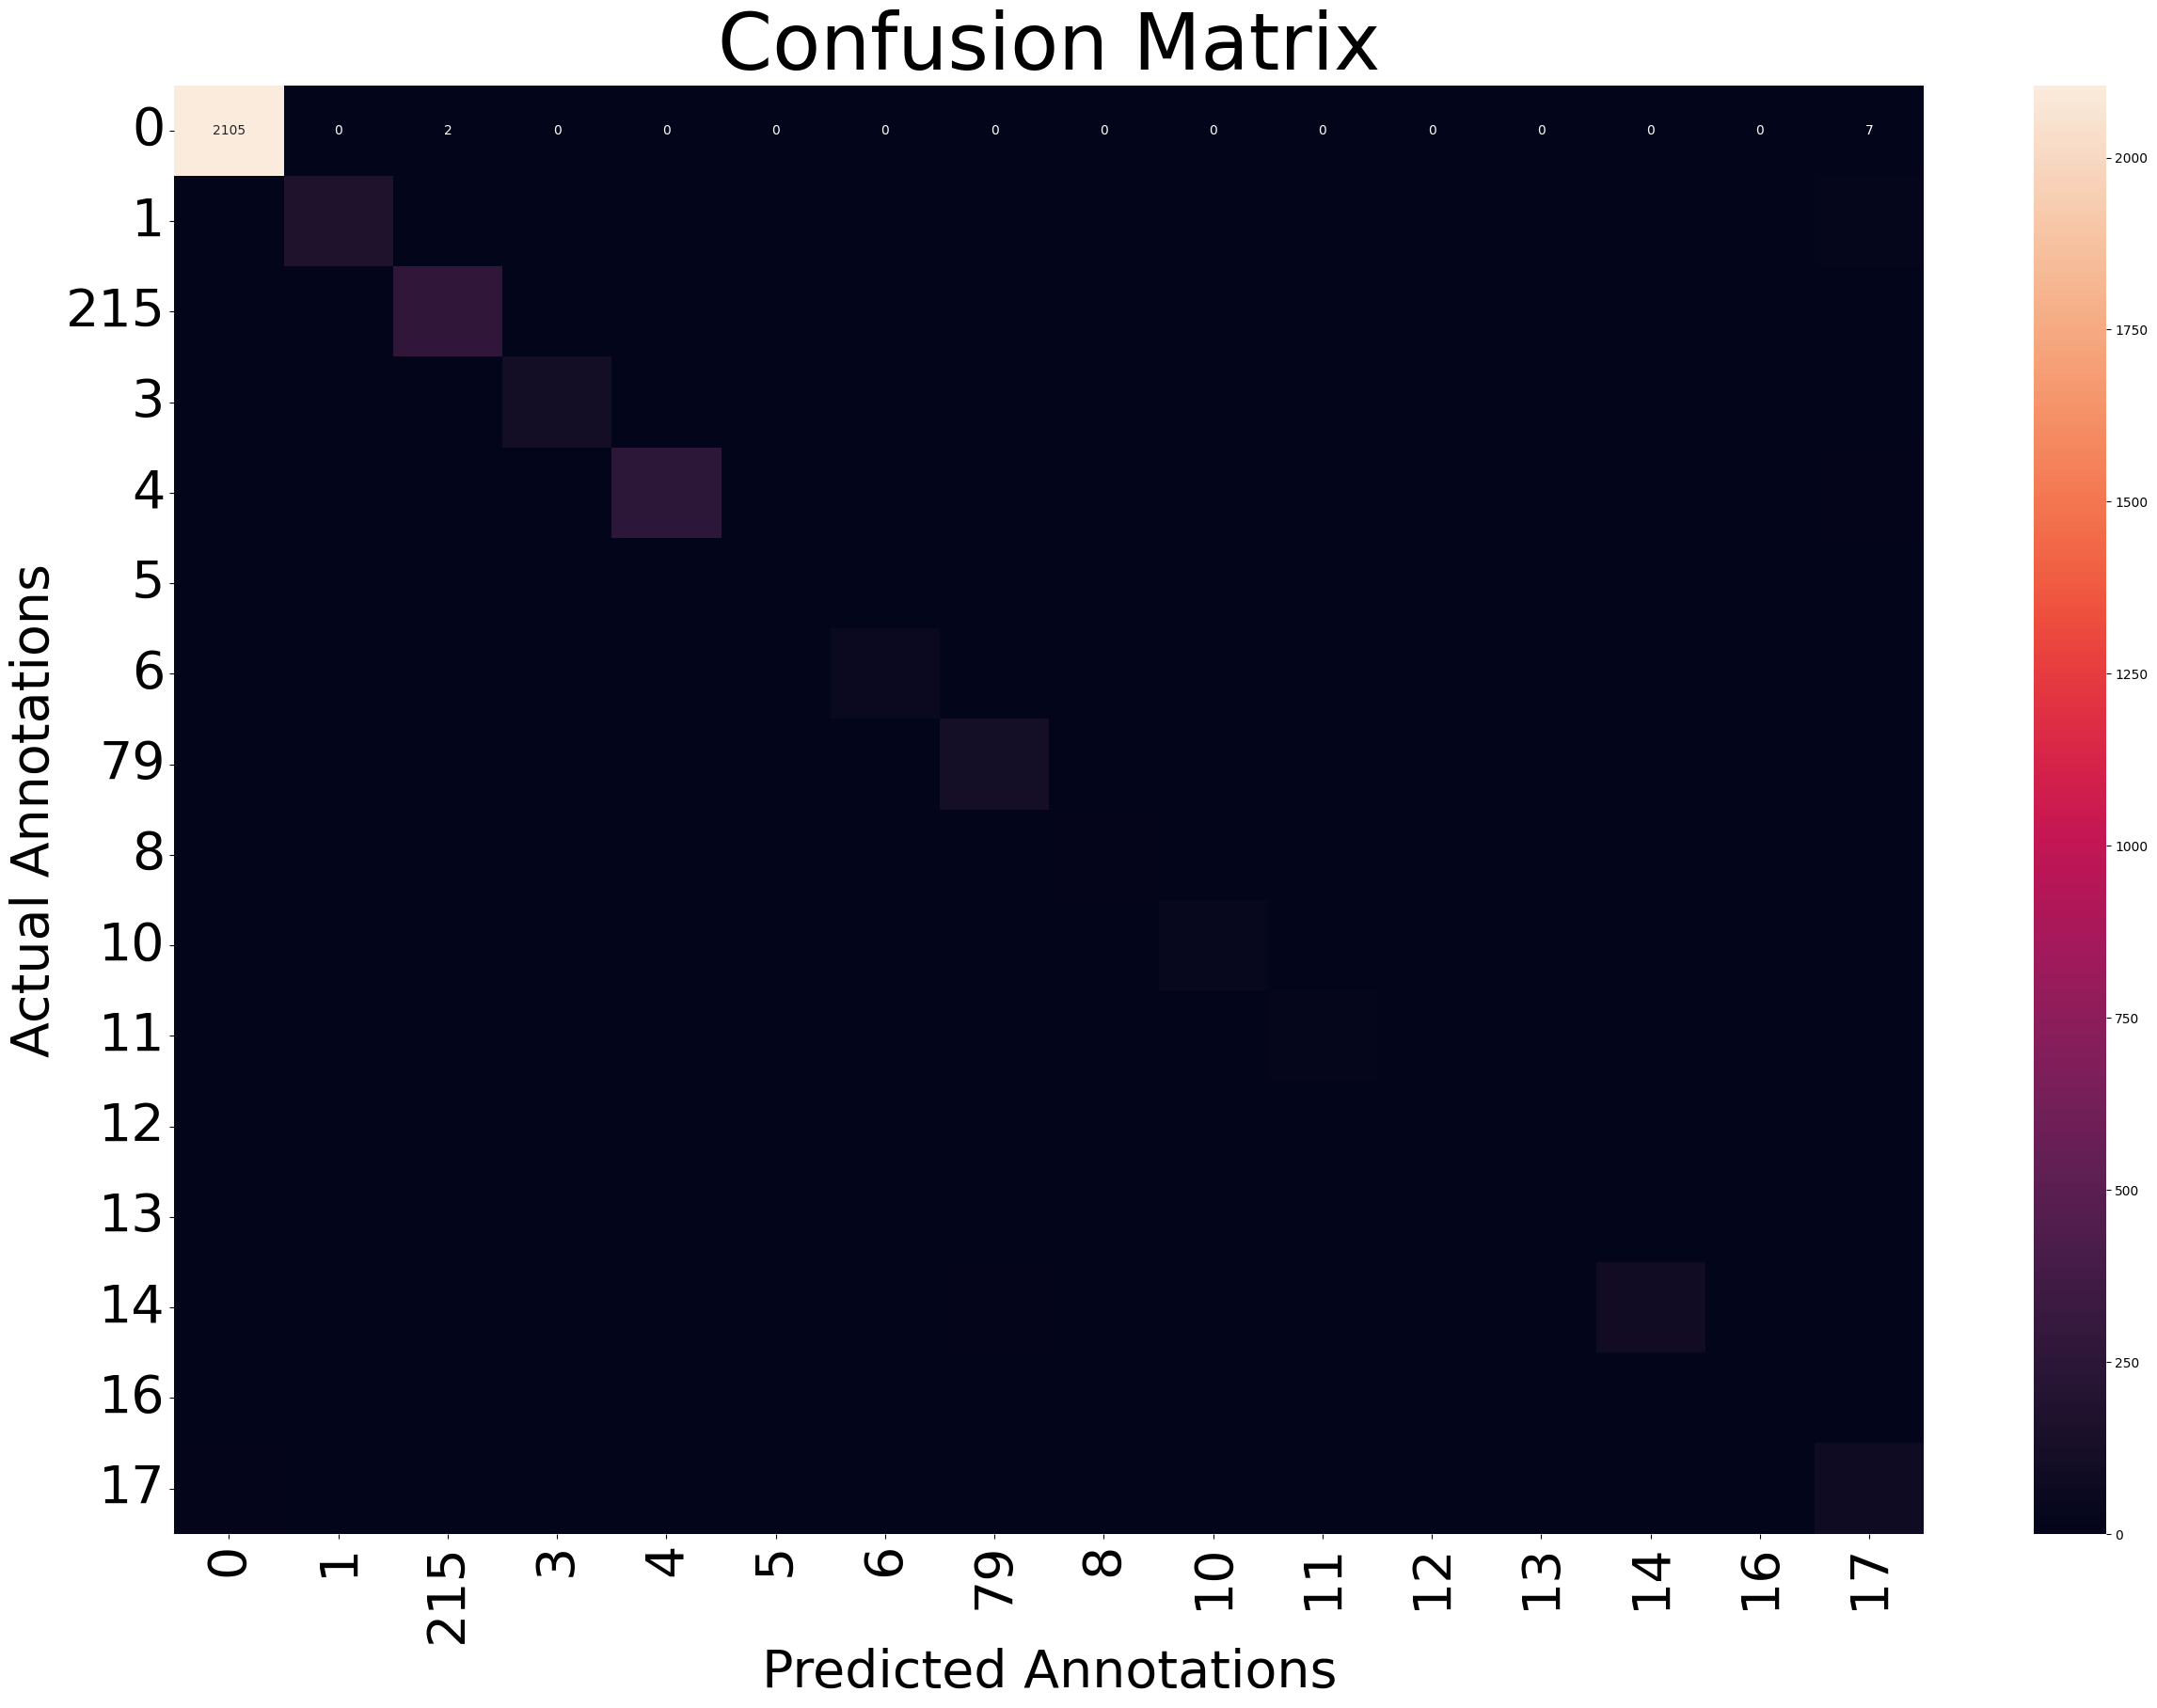

C:\Users\Aadiv Das\AppData\Local\Temp\ipykernel_12336\1132968796.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  C_M_Normalized = C_M.astype('float') / C_M.max(axis=1)[:, np.newaxis]


         0      1    215    3      4      5      6     79      8     10  \
0    1.000  0.000  0.001  0.0  0.000  0.000  0.000  0.000  0.000  0.000   
1    0.000  1.000  0.012  0.0  0.036  0.000  0.000  0.006  0.000  0.000   
215  0.015  0.000  1.000  0.0  0.015  0.000  0.015  0.011  0.000  0.000   
3    0.010  0.000  0.000  1.0  0.000  0.000  0.000  0.000  0.000  0.000   
4    0.008  0.020  0.004  0.0  1.000  0.000  0.004  0.004  0.000  0.004   
5    0.000  0.000  0.000  0.0  0.000  0.000  0.000  0.000  0.000  0.000   
6    0.000  0.018  0.018  0.0  0.000  0.000  1.000  0.054  0.018  0.000   
79   0.000  0.000  0.019  0.0  0.000  0.000  0.000  1.000  0.000  0.000   
8    0.000  0.000  0.000  0.0  0.000  0.000  0.154  0.385  1.000  0.000   
10   0.000  0.000  0.000  0.0  0.000  0.000  0.000  0.000  0.000  1.000   
11   0.000  0.000  0.000  0.0  0.000  0.000  0.000  0.000  0.000  0.000   
12   0.000  0.000  0.000  0.0  0.000  0.000  0.000  0.000  0.000  0.000   
13   0.000  0.000  0.000 

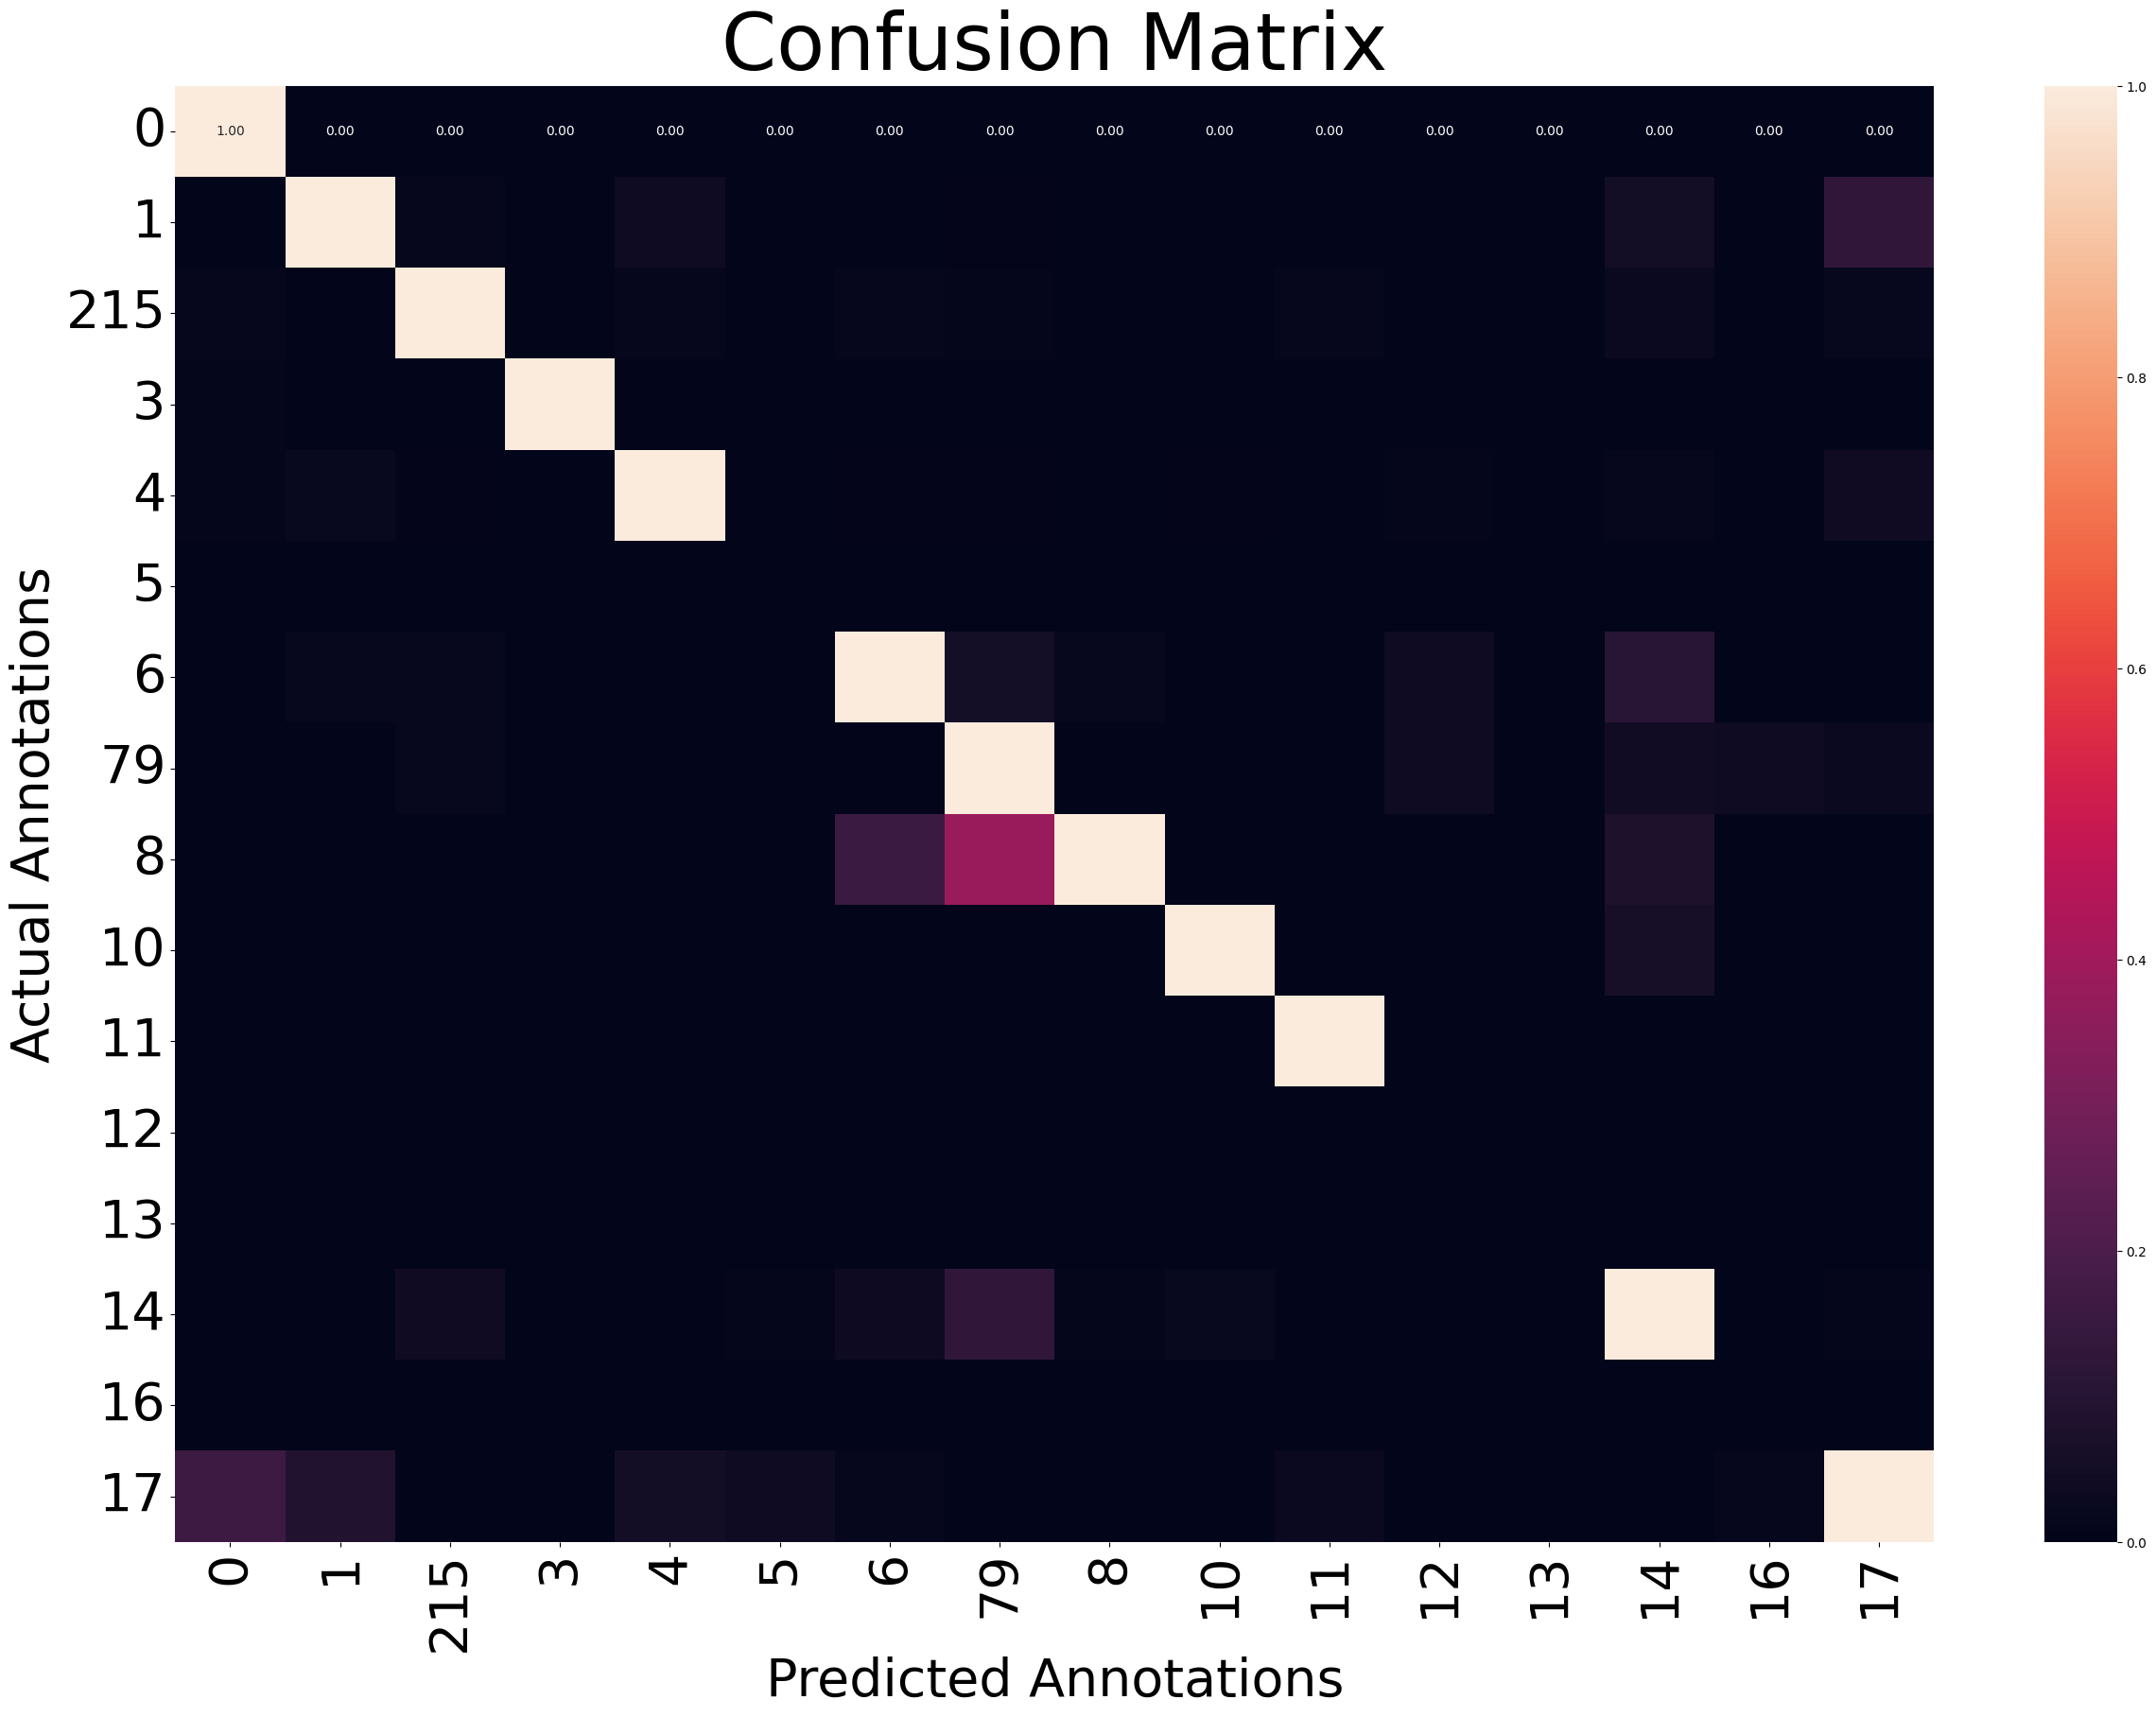

In [124]:
MM = confusion_matrix(new_class,new_school_list,new_true_list) 

### Confusion matrix after removing unnecessary classes

Sum of rows:
 0      2114
1       203
215     301
3       105
4       273
5         0
6        70
79      126
8        21
10       35
11       21
12        0
13        0
14      119
16        0
17      112
dtype: int64
[5, 11, 12, 14]
        0    1  215    3    4  5   6   79   8  10  11  12  14  16  17
0    2105    0    2    0    0  0   0    0   0   0   0   0   0   0   7
1       0  165    2    0    6  0   0    1   0   0   0   0   8   0  21
215     4    0  270    0    4  0   4    3   0   0   4   0   7   0   5
3       1    0    0  104    0  0   0    0   0   0   0   0   0   0   0
4       2    5    1    0  247  0   1    1   0   1   0   2   3   0  10
6       0    1    1    0    0  0  56    3   1   0   0   2   6   0   0
79      0    0    2    0    0  0   0  108   0   0   0   4   5   4   3
8       0    0    0    0    0  0   2    5  13   0   0   0   1   0   0
10      0    0    0    0    0  0   0    0   0  33   0   0   2   0   0
11      0    0    0    0    0  0   0    0   0   0  21   0   0   0

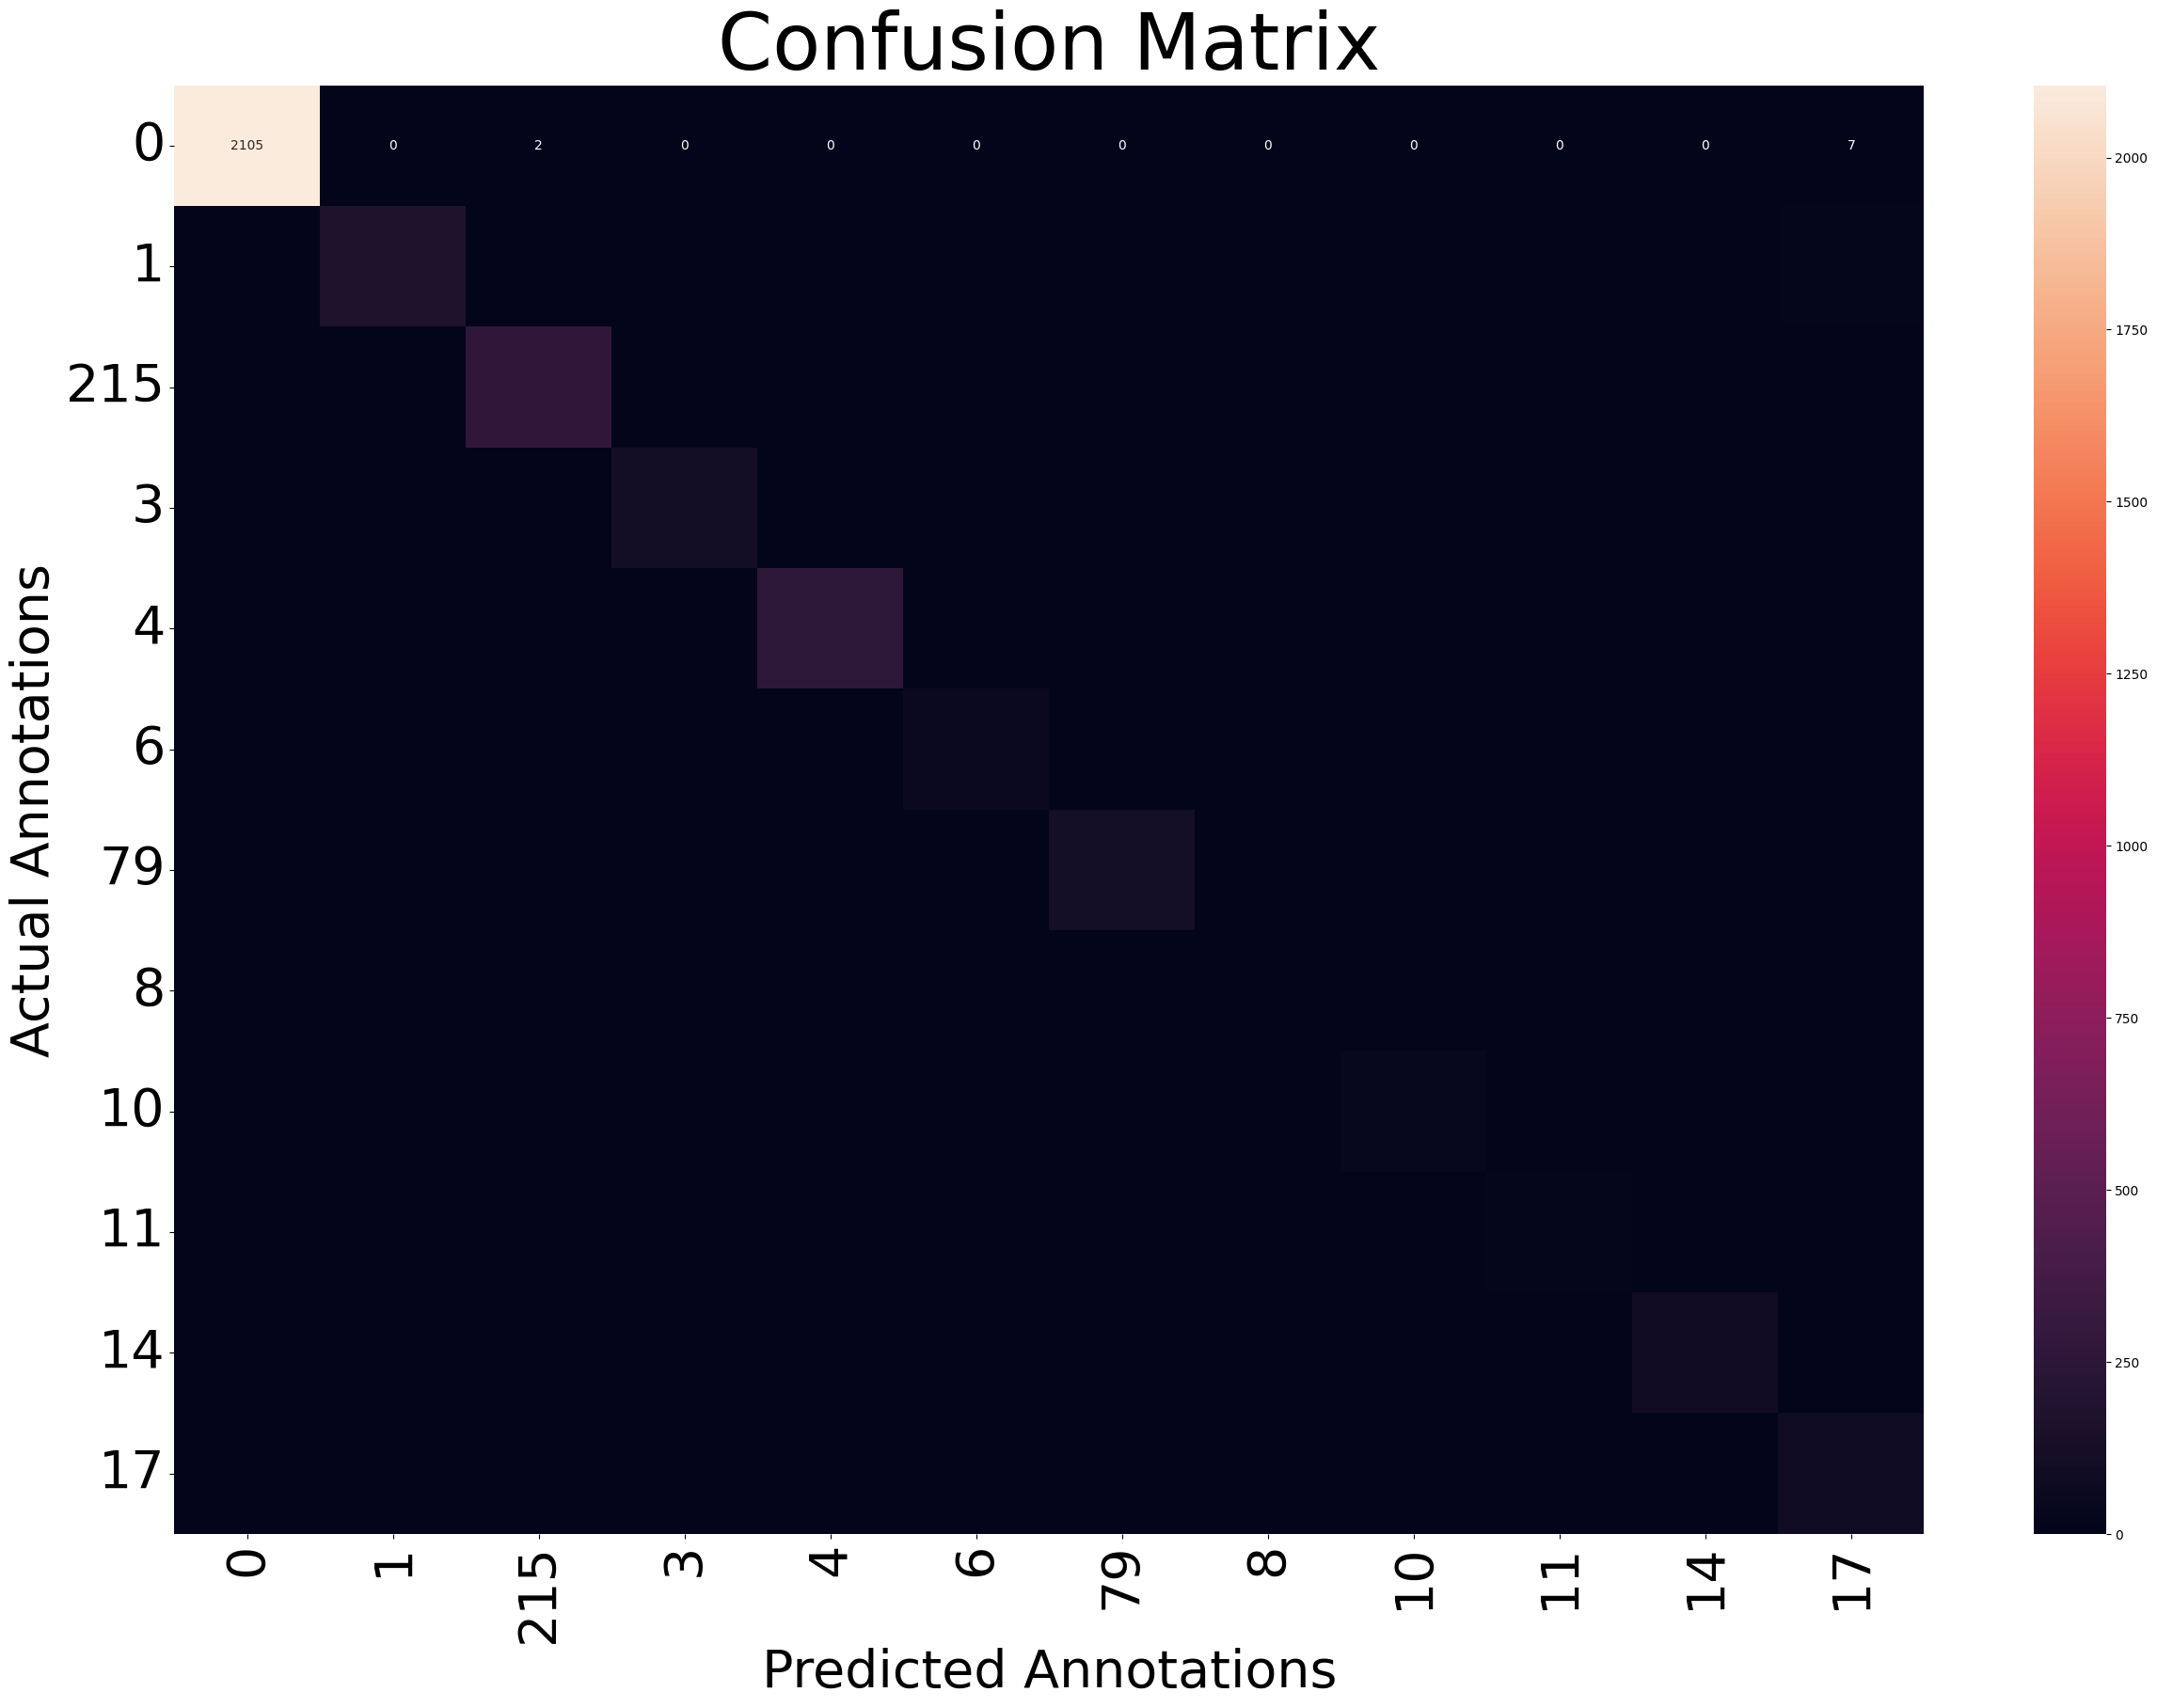

C:\Users\Aadiv Das\AppData\Local\Temp\ipykernel_12336\4166045190.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  MM_Normalized = MM.astype('float') / MM.max(axis=1)[:, np.newaxis]


         0      1    215    3      4      5      6     79      8     10  \
0    1.000  0.000  0.001  0.0  0.000  0.000  0.000  0.000  0.000  0.000   
1    0.000  1.000  0.012  0.0  0.036  0.000  0.000  0.006  0.000  0.000   
215  0.015  0.000  1.000  0.0  0.015  0.000  0.015  0.011  0.000  0.000   
3    0.010  0.000  0.000  1.0  0.000  0.000  0.000  0.000  0.000  0.000   
4    0.008  0.020  0.004  0.0  1.000  0.000  0.004  0.004  0.000  0.004   
6    0.000  0.018  0.018  0.0  0.000  0.000  1.000  0.054  0.018  0.000   
79   0.000  0.000  0.019  0.0  0.000  0.000  0.000  1.000  0.000  0.000   
8    0.000  0.000  0.000  0.0  0.000  0.000  0.154  0.385  1.000  0.000   
10   0.000  0.000  0.000  0.0  0.000  0.000  0.000  0.000  0.000  1.000   
11   0.000  0.000  0.000  0.0  0.000  0.000  0.000  0.000  0.000  0.000   
14   0.000  0.000  0.042  0.0  0.000  0.011  0.032  0.126  0.011  0.021   
17   0.160  0.086  0.000  0.0  0.049  0.037  0.012  0.000  0.000  0.000   

        11     12     14

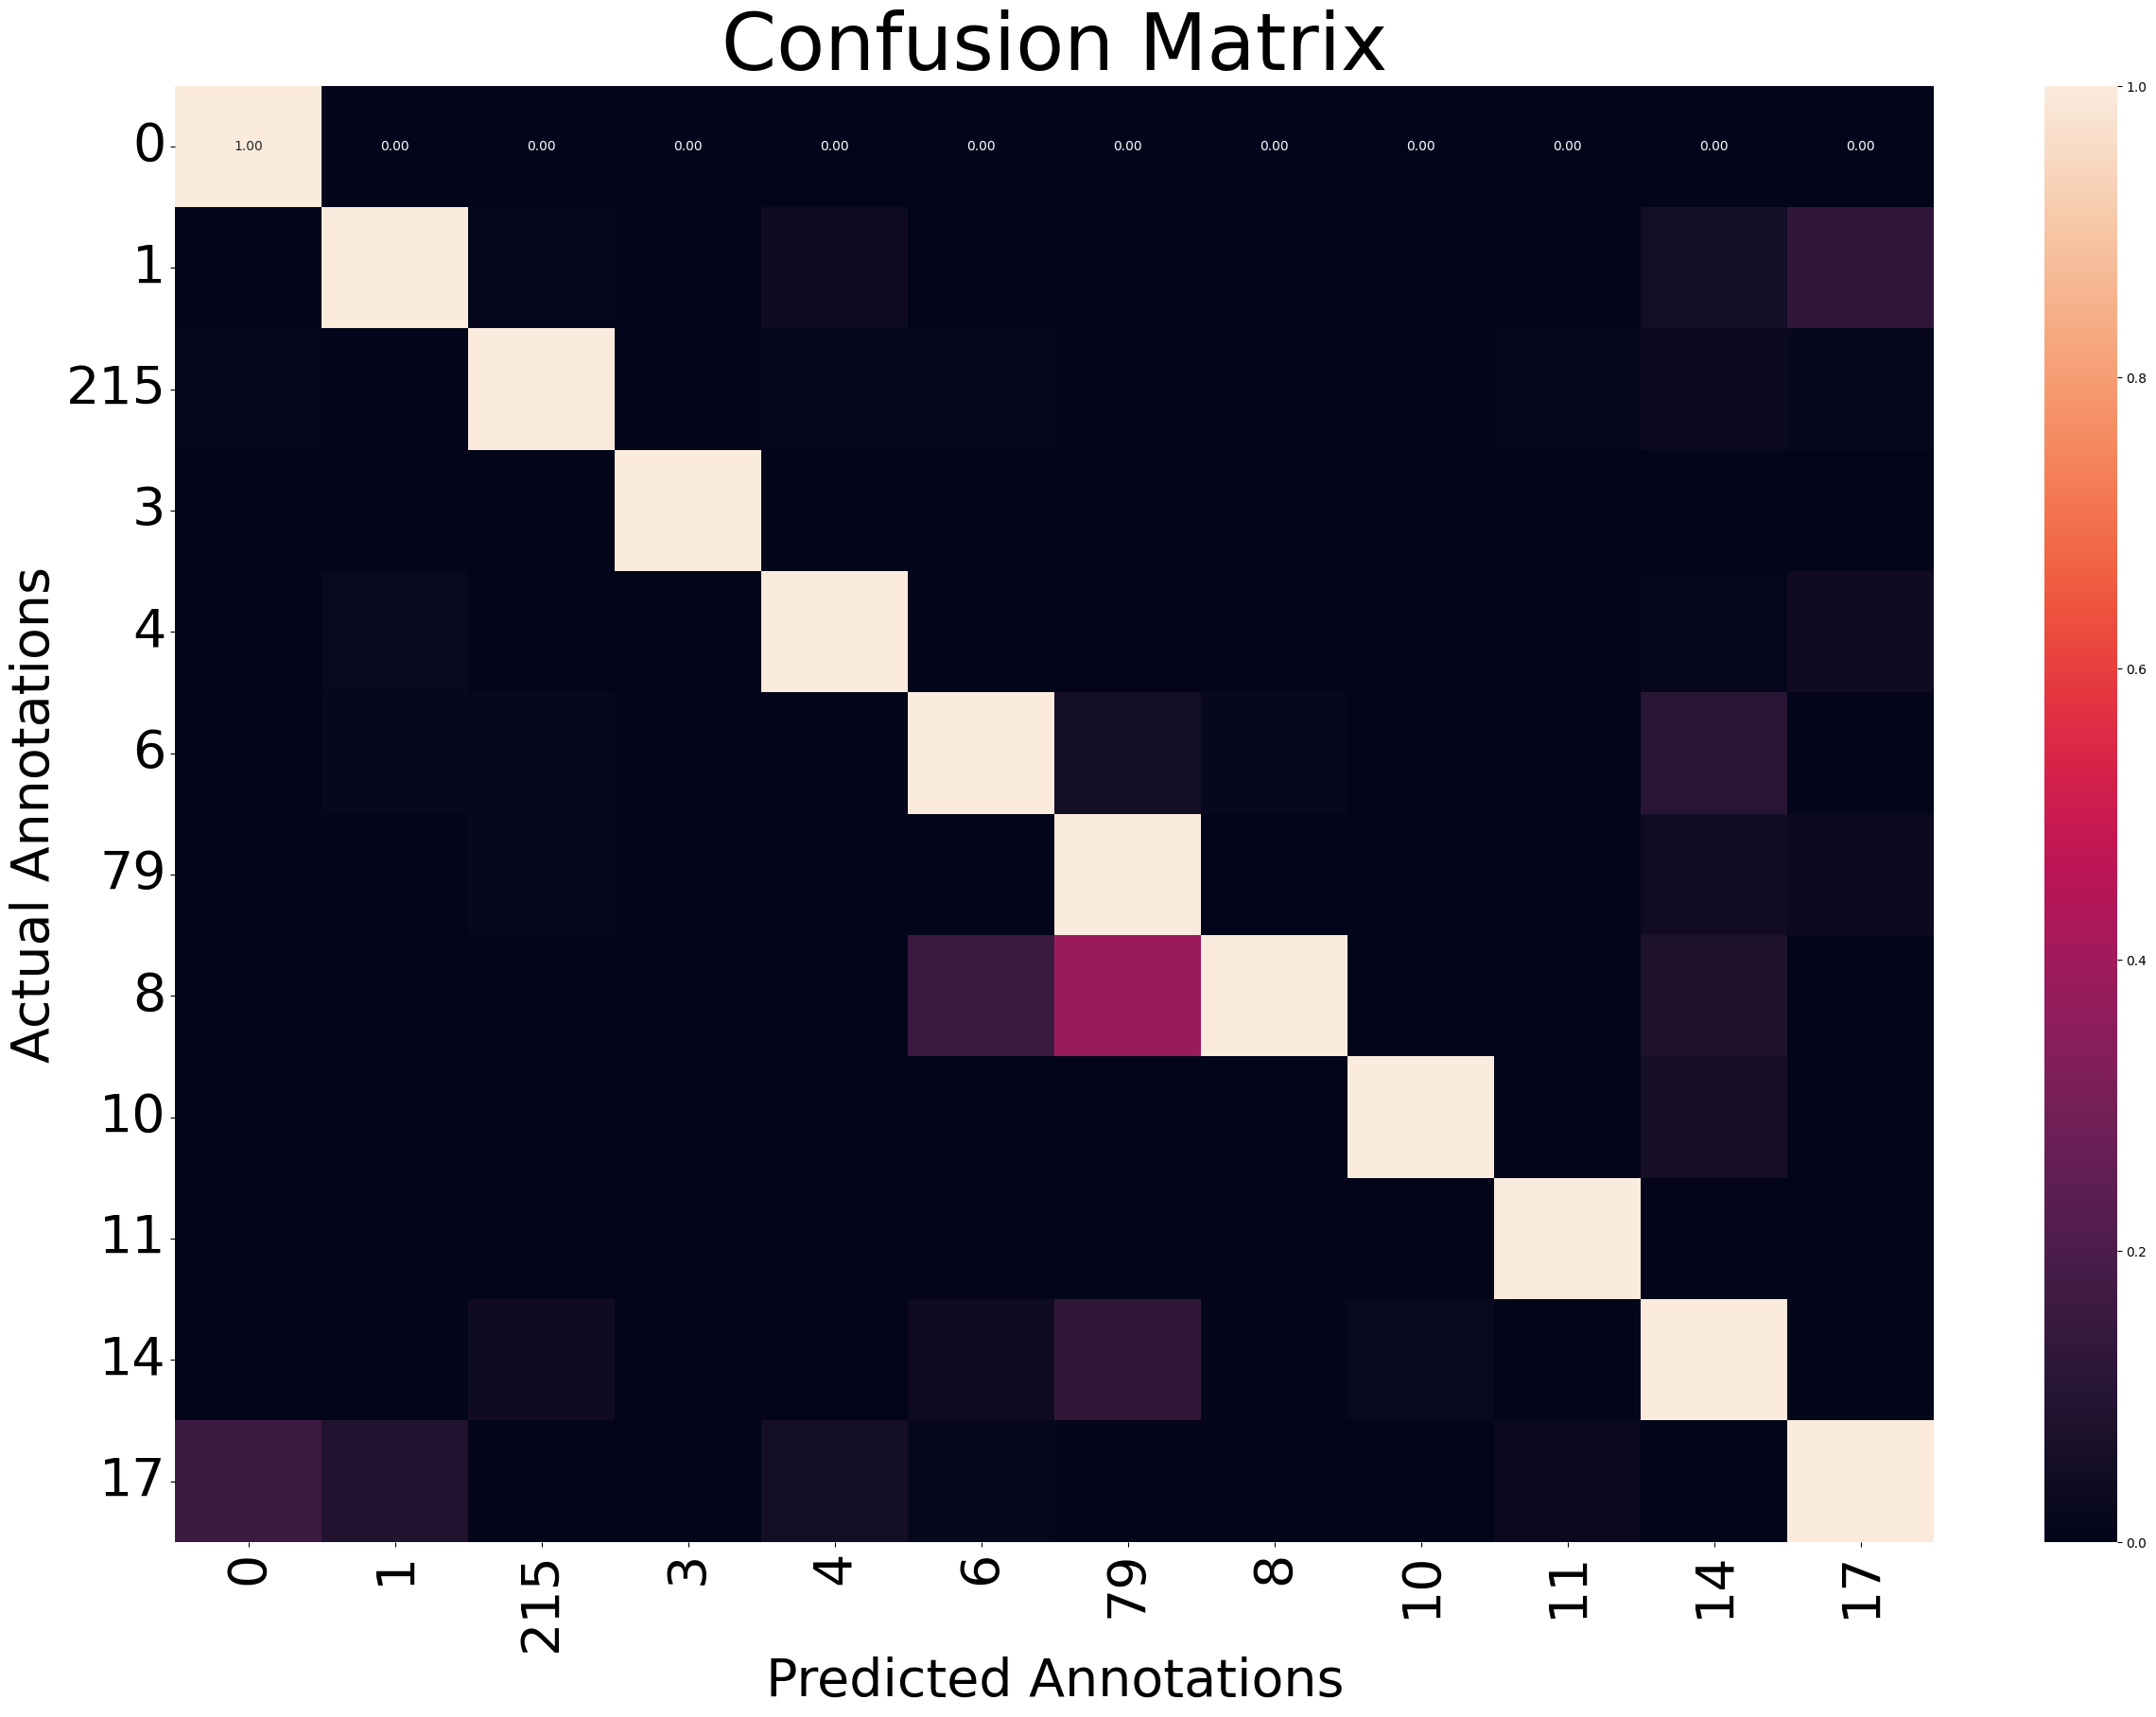

In [125]:
new_MM, index = merged_matrix(MM)

### Confusion matrix for relevant and irrelevant sets

In [126]:
print("Classes disappering after merging to threshold:",index)
relevant_classes = [x for x in classes_relevant if x not in index]
relevant_classes = list(set(['79' if x in ['7', '9'] else x for x in relevant_classes]))
irrelevant_classes = classes_irrelevant + index
irrelevant_classes = list(set(['215' if x in ['2', '15'] else x for x in irrelevant_classes]))
print('relevant_classes:',relevant_classes) 
print('irrelevant_classes:',irrelevant_classes)     

Classes disappering after merging to threshold: [5, 11, 12, 14]
relevant_classes: ['79', '14', '5', '8', '16', '11', '13', '6', '12']
irrelevant_classes: ['3', '17', 5, 11, '215', 12, 14, '1', '4', '0']


            relevant  irrelevant
relevant         181           1
irrelevant        14        3304


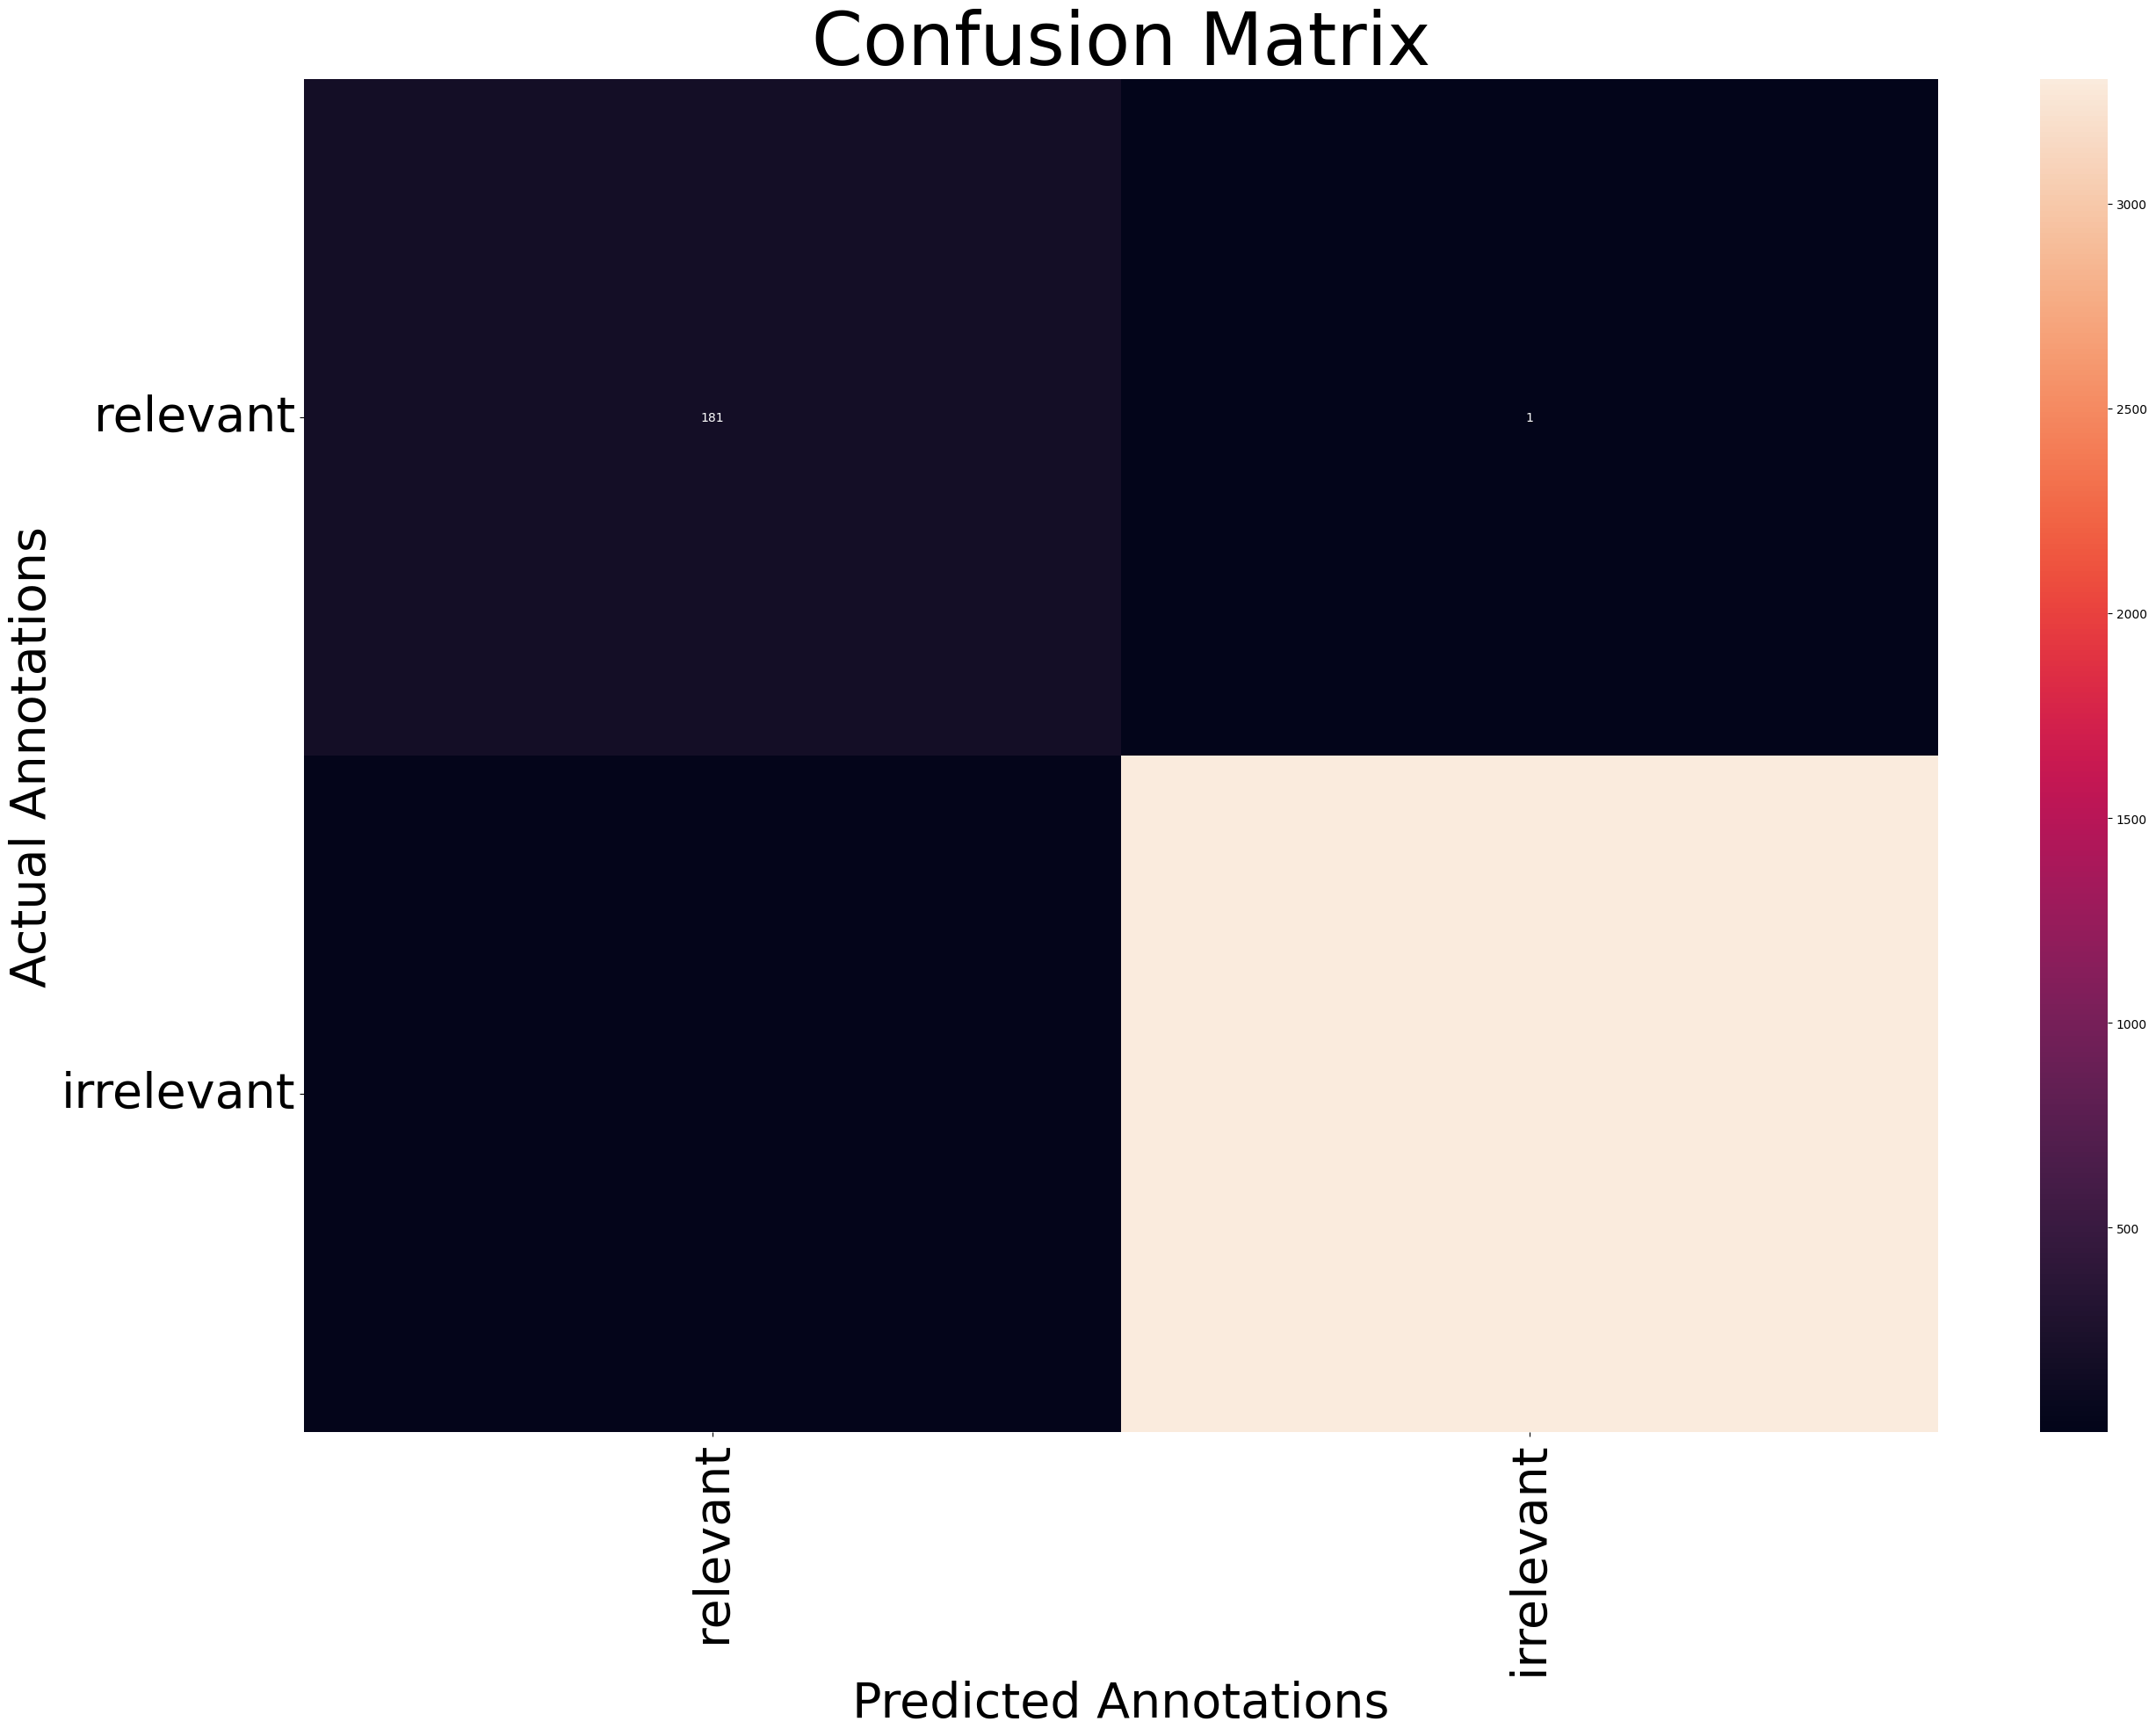

In [127]:
sub_matrix(MM, relevant_classes, irrelevant_classes)

### Agreement before merging

In [21]:
print("Inter-Rater agreement: ",kd.alpha(np.array(school_list))*100,"%")  #Inter-Annotator agreement assuming nominal categories

Inter-Rater agreement:  72.25031997537045 %


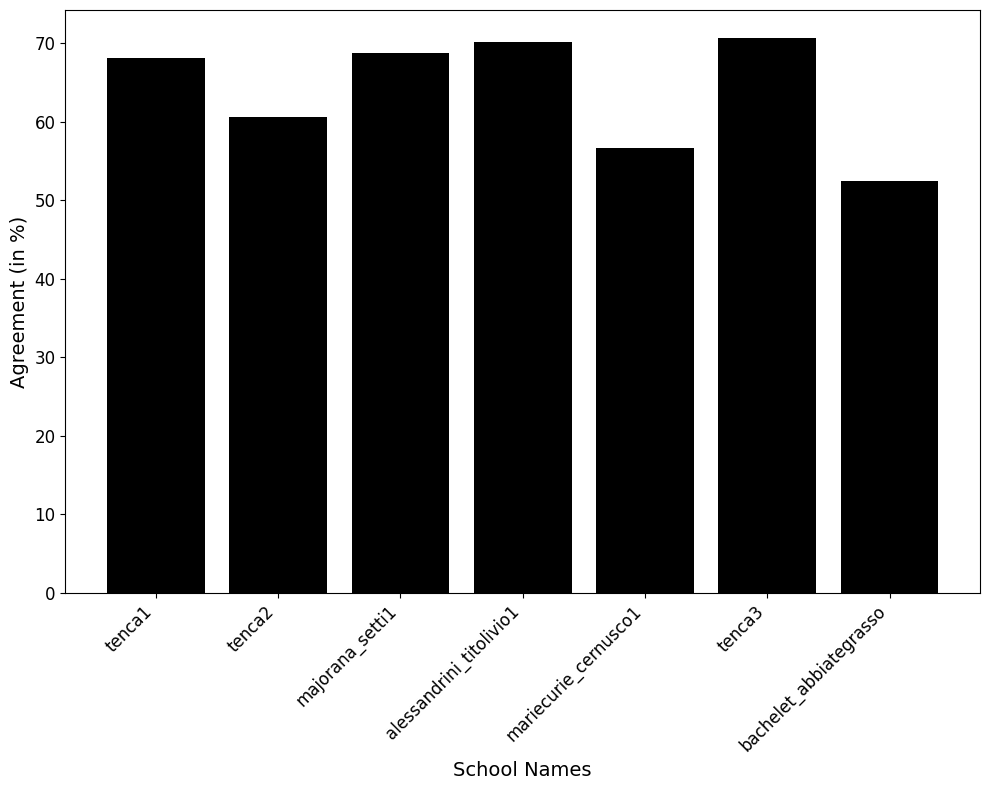

In [23]:
bar_list = [IntraRater(tenca1),IntraRater(tenca2),IntraRater(majorana_setti1),IntraRater(alessandrini_titolivio1),IntraRater(mariecurie_cernusco1),
             IntraRater(tenca3),IntraRater(bachelet_abbiategrasso)]

names = ['tenca1','tenca2','majorana_setti1','alessandrini_titolivio1','mariecurie_cernusco1',
         'tenca3','bachelet_abbiategrasso']

plot_intra_rater_agreement(bar_list, names)

### Agreement after merging

In [128]:
print("Inter-Rater agreement: ",kd.alpha(np.array(new_school_list))*100,"%")  #Inter-Annotator agreement assuming nominal categories

Inter-Rater agreement:  89.10322639392874 %


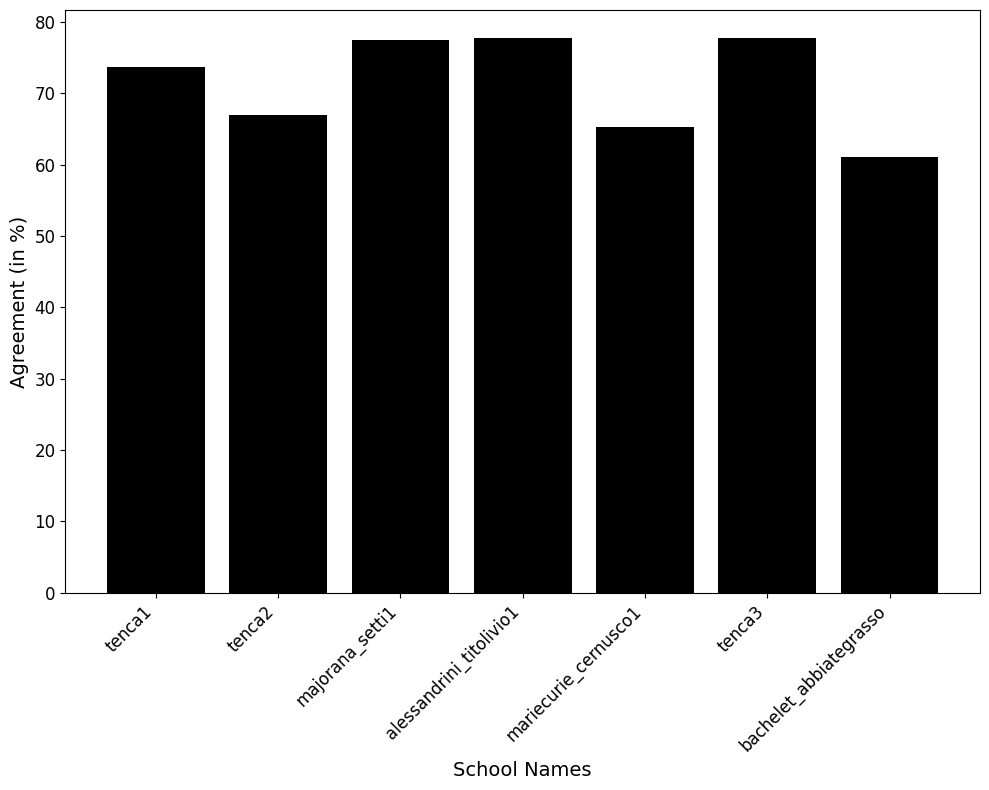

In [129]:
bar_list = [IntraRater(tenca1),IntraRater(tenca2),IntraRater(majorana_setti1),IntraRater(alessandrini_titolivio1),IntraRater(mariecurie_cernusco1),
             IntraRater(tenca3),IntraRater(bachelet_abbiategrasso)]

names = ['tenca1','tenca2','majorana_setti1','alessandrini_titolivio1','mariecurie_cernusco1',
         'tenca3','bachelet_abbiategrasso']

plot_intra_rater_agreement(bar_list, names)